In [ ]:
import numpy as np 
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

import missingno as msno #visualises missing values
from wordcloud import WordCloud #to find the most frequent words 

In [ ]:
#data that is being scraped from source 
scrape = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv"

### Pre-Processing(data cleaning):
- loading
- peeking
- general info

In [ ]:
#loading data 
df = pd.read_csv(scrape)

In [ ]:
df.head()

In [ ]:
df.tail() #addressed results a few lines down

In [ ]:
#number of countries with monkeypox cases
len(df["Country"].unique())

In [ ]:
df.info()

In [ ]:
#to see the number of missing values for the columns in the dataset

df.isnull().sum() 

In [ ]:
#further breakdown of missing values and their proportionality

total = df.isnull().sum().sort_values(ascending=False) #my isnull function loops through each row in a single column and return 1 for missing data & 0 for non-missing 
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #finds the percentage of these missing values that each colum adds up to
missing_values = pd.concat([total, percentage], axis=1, keys=["Total", "Percentage"])
missing_values.head(50)

In [ ]:
#BASED ON THE OUTPUT OF THE CODE ABOVE I NEED TO OMIT THE USELESS COLUMNS WITH MISSING VALUES, BUT I CANNOT DECIDE ON WHAT TO DO SO ILL LEAVE IT

##### A few values will have to be omitted due to their lack of importance in regards to the integrity of my dataset 

### Exploratory Data Analysis (EDA)

In [ ]:
#to show the top 15 countries by monkeypox cases in desc order
df["Country"].value_counts().nlargest(n=15)

In [ ]:
#function that plots the number of monkeypox cases per country (matplotlib & seaborn) (non interactive)
def countrycases():
    plt.figure(figsize=(50,8))
    sns.countplot(x="Country", data=df)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
countrycases()

In [ ]:
#lists the top 15 cities with monkeypox cases ranked in desc order
citycases = df["City"].value_counts().nlargest(n=15)
print(citycases)

<AxesSubplot:xlabel='Status', ylabel='count'>

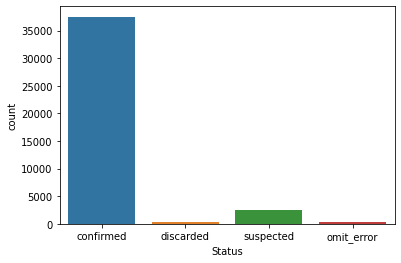

In [180]:
#distribution based on status (total)
sns.countplot(x="Status",data=df)

In [ ]:
#distribution based on country

top_countries=list(df["Country"].value_counts().to_frame().nlargest(115,"Country").index)
top_countries_df = df[df["Country"].isin(top_countries)]

In [191]:
#SUPPOSED TO RUN BUT NOW RUNNING, FIX IN THE MORNING
sns.catplot(data=top_countries_df,kind="Count", x = "Country", hue = "Status") 



ValueError: Plot kind 'Count' is not recognized

<Figure size 2160x720 with 0 Axes>